In [41]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1.1

In [168]:
def ddmodel(T, dt, Ia, Ib, s, m):
    decision = None
    rt = None

    # calculate total time in seconds
    seconds = T * dt

    X = np.linspace(0, seconds, T)
    Y = np.zeros(T)

    for i, x in enumerate(X[0:]):
        Y[i] = Y[i-1] + (dt * (Ia - Ib + (s * np.random.normal(0, 1))))

        # if Y[i] crosses the threshold +/-m, set it to +/-m
        if Y[i] > m: 
            Y[i:] = m
            decision = "A"
            rt = X[i]
            break
        
        if Y[i] < -m: 
            Y[i:] = -m
            decision = "B"
            rt = X[i]
            break

    return X, Y, m, decision, rt

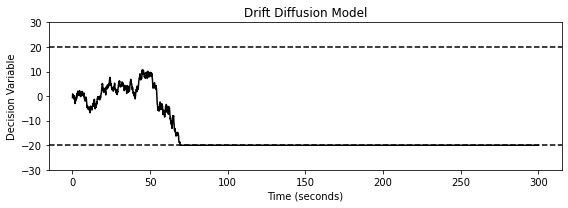

In [155]:
x, y, m, _, _ = ddmodel(3000, 0.1, 0.95, 1, 7, 20)

plt.figure(figsize=(8, 3))
plt.plot(x, y, color='k')
plt.title('Drift Diffusion Model')
plt.xlabel('Time (seconds)')
plt.ylabel('Decision Variable')
plt.axhline(y=m, color='k', linestyle='--')
plt.axhline(y=-m, color='k', linestyle='--')
plt.ylim(-1.5 * m, 1.5 * m)
plt.tight_layout()
plt.show()

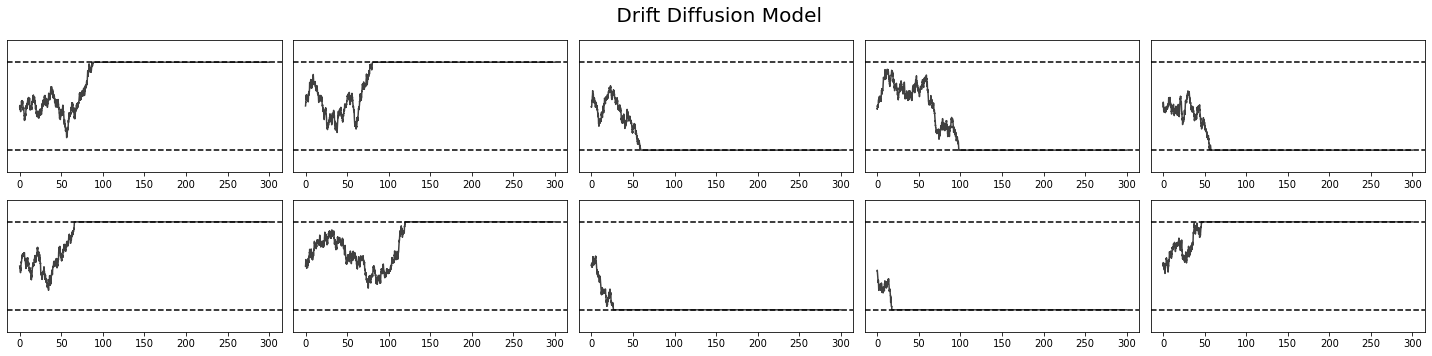

In [156]:
plt.figure(figsize=(20, 5))
plt.suptitle(' Drift Diffusion Model', fontsize=20)

for i in range(10):
    plt.subplot(2, 5, i+1)
    x, y, m, _, _ = ddmodel(3000, 0.1, 0.95, 1, 7, 20)
    plt.plot(x, y, color='k', alpha=0.75)
    plt.axhline(y=m, color='k', linestyle='--')
    plt.axhline(y=-m, color='k', linestyle='--')
    plt.yticks([])
    plt.ylim(-1.5 * m, 1.5 * m)

plt.tight_layout()
plt.savefig('11.png')
plt.show()
    

# 1.2

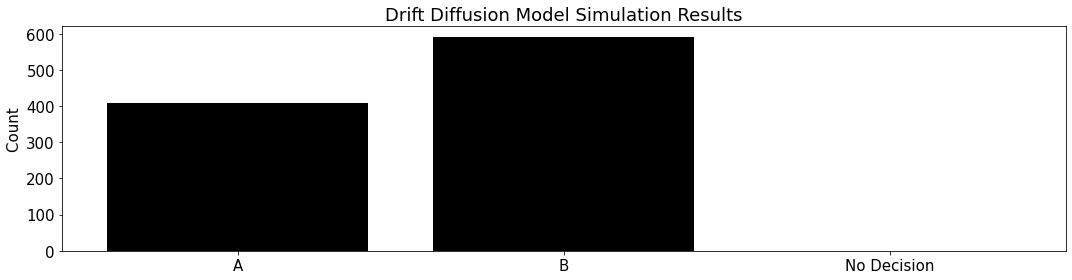

Decision A: 409
Decision B: 591
No Decision: 0


In [157]:
Acount = 0
Bcount = 0
Ncount = 0

for i in range(1000):
    _, _, _, decision, _ = ddmodel(10000, 0.1, 0.95, 1, 7, 20)
    
    if decision == "A": Acount += 1
    elif decision == "B": Bcount += 1
    else: Ncount += 1

# plot a bar graph of the results
plt.figure(figsize=(15, 4))
plt.bar(['A', 'B', 'No Decision'], [Acount, Bcount, Ncount], color='k')
plt.title('Drift Diffusion Model Simulation Results', fontsize=18)
plt.ylabel('    Count', fontsize=15)
plt.xticks(fontsize=15)  # Increase the font size of the x-axis labels
plt.yticks(fontsize=15)  # Increase the font size of the y-axis labels
plt.tight_layout()
plt.savefig('12.png')
plt.show()

print(f"Decision A: {Acount}")
print(f"Decision B: {Bcount}")
print(f"No Decision: {Ncount}")

# 1.3

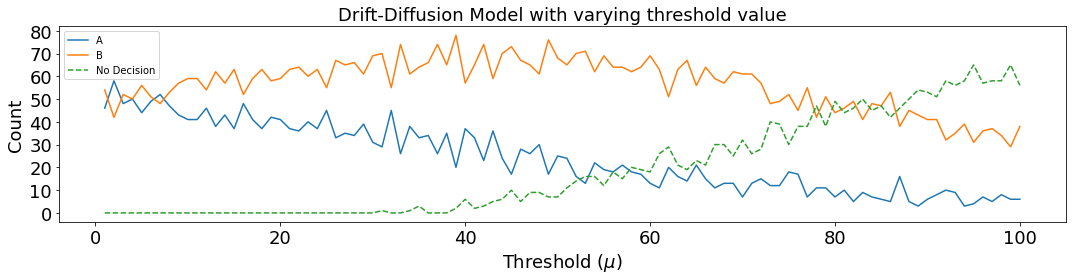

In [158]:
M = np.linspace(1, 100, 100)

Acount = np.zeros(100)
Bcount = np.zeros(100)
Ncount = np.zeros(100)

for i, m in enumerate(M):
    for j in range(100):
        _, _, _, decision, _ = ddmodel(10000, 0.1, 0.95, 1, 7, m)
        
        if decision == "A": Acount[i] += 1
        elif decision == "B": Bcount[i] += 1
        else: Ncount[i] += 1

# plot a line graph of the results
plt.figure(figsize=(15, 4))
plt.plot(M, Acount, label='A')
plt.plot(M, Bcount, label='B')
plt.plot(M, Ncount, linestyle='--', label='No Decision')
plt.title('Drift-Diffusion Model with varying threshold value', fontsize=18)
plt.xlabel(r'Threshold ($\mu$)', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend()
plt.tight_layout()
plt.savefig('131.png')
plt.show()


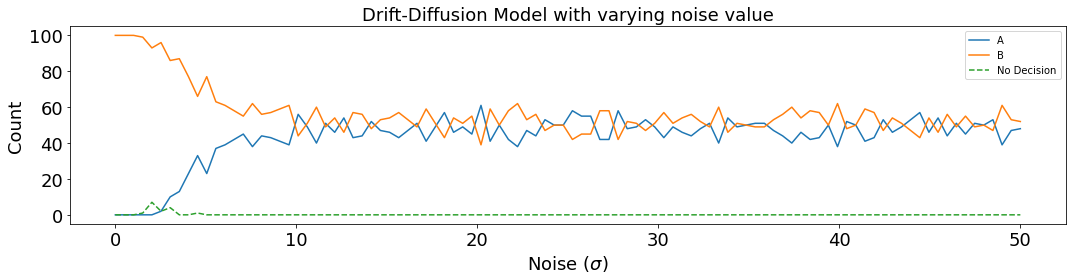

In [159]:
S = np.linspace(0, 50, 100)

Acount = np.zeros(100)
Bcount = np.zeros(100)
Ncount = np.zeros(100)

for i, s in enumerate(S):
    for j in range(100):
        _, _, _, decision, _ = ddmodel(10000, 0.1, 0.95, 1, s, 20)
        
        if decision == "A": Acount[i] += 1
        elif decision == "B": Bcount[i] += 1
        else: Ncount[i] += 1

# plot a line graph of the results
plt.figure(figsize=(15, 4))
plt.plot(S, Acount, label='A')
plt.plot(S, Bcount, label='B')
plt.plot(S, Ncount, linestyle='--', label='No Decision')
plt.title('Drift-Diffusion Model with varying noise value', fontsize=18)
plt.xlabel(r'Noise ($\sigma$)', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend()
plt.tight_layout()
plt.savefig('132.png')
plt.show()

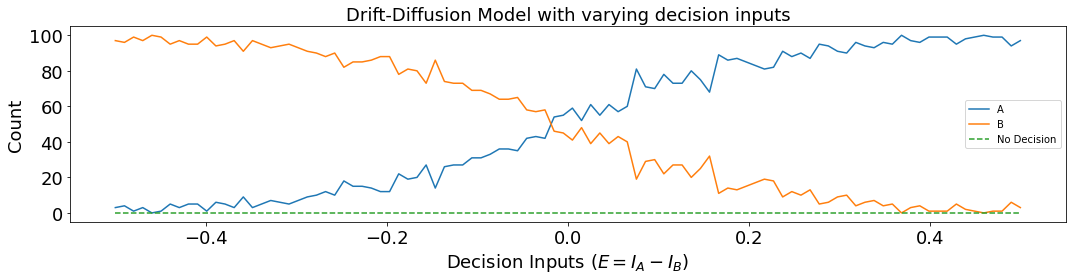

In [160]:
E = np.linspace(-0.5, 0.5, 100)

Acount = np.zeros(100)
Bcount = np.zeros(100)
Ncount = np.zeros(100)

for i, e in enumerate(E):
    for j in range(100):
        _, _, _, decision, _ = ddmodel(10000, 0.1, e, 0, 7, 20)
        
        if decision == "A": Acount[i] += 1
        elif decision == "B": Bcount[i] += 1
        else: Ncount[i] += 1

# plot a line graph of the results
plt.figure(figsize=(15, 4))
plt.plot(E, Acount, label='A')
plt.plot(E, Bcount, label='B')
plt.plot(E, Ncount, linestyle='--', label='No Decision')
plt.title('Drift-Diffusion Model with varying decision inputs', fontsize=18)
plt.xlabel(r'Decision Inputs ($E = I_A - I_B$)', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend()
plt.tight_layout()
plt.savefig('133.png')
plt.show()

# 1.4

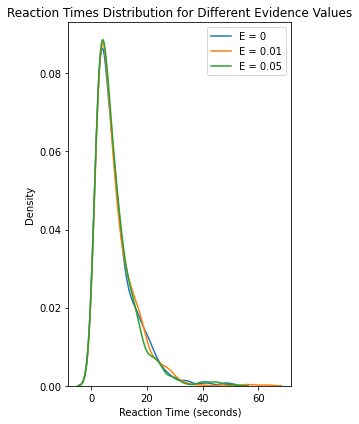

In [161]:
E = [0, 0.01, 0.05]
R = np.zeros((len(E), 1000))

plt.figure(figsize=(4, 6))

for i, e in enumerate(E):
    for j in range(1000):
        _, _, _, _, rt = ddmodel(10000, 0.1, e, 0, 7, 20)
        R[i][j] = rt

    sns.kdeplot(R[i], label=f"E = {e}")

plt.title("Reaction Times Distribution for Different Evidence Values")
plt.xlabel("Reaction Time (seconds)")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.savefig('14.png')
plt.show()


Decisions for E=0: A=511, B=489
Mean RT for A: 86.6224, Std Dev: 68.9571
Mean RT for B: 84.9379, Std Dev: 64.9818


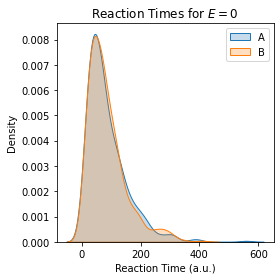

Decisions for E=0.01: A=518, B=482
Mean RT for A: 83.2913, Std Dev: 70.2878
Mean RT for B: 87.4895, Std Dev: 65.8487


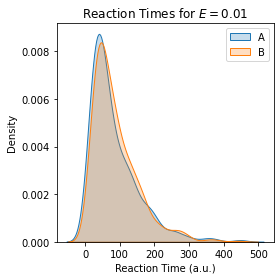

Decisions for E=0.05: A=620, B=380
Mean RT for A: 81.7620, Std Dev: 70.6781
Mean RT for B: 82.4706, Std Dev: 67.0079


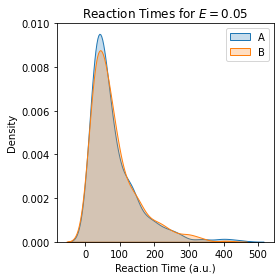

In [171]:
E = [0, 0.01, 0.05]

for i, e in enumerate(E):
    A = []
    B = []
    
    for j in range(1000):
        _, _, _, decision, rt = ddmodel(10000, 0.1, e + 1, 1, 7, 20)
        if decision == "A": A.append(rt)
        elif decision == "B": B.append(rt)

    # Diagnostic prints
    print(f"Decisions for E={e}: A={len(A)}, B={len(B)}")
    print(f"Mean RT for A: {np.mean(A):.4f}, Std Dev: {np.std(A):.4f}")    
    print(f"Mean RT for B: {np.mean(B):.4f}, Std Dev: {np.std(B):.4f}")

    plt.figure(figsize=(4, 4))
    sns.kdeplot(A, label="A", fill=True, common_norm=True)
    sns.kdeplot(B, label="B", fill=True, common_norm=True)

    plt.title(rf"Reaction Times for $E = {e}$")
    plt.xlabel("Reaction Time (a.u.)")
    plt.ylabel("Density")
    plt.legend()
    plt.tight_layout()
    plt.savefig(f'14{i+1}.png')
    plt.show()
